## Toyota_used_car_ML

Md. Rakibul Hasan
<br> Civil Engineer
<br> MS in Disaster Management (Contd.), University of Dhaka.


#### Objectives:
- Load the data, 
- Perform Label Encoding or One-hot Encoding (Explain which one is best suitable for your analysis),
- Split the original dataset into the train set (80%) and the test set (20%), 
- Perform Linear Regression and Predict the 'Price' from the test set, 
- Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients),
- Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable,
- Compare the actual and predicted target variable through visualization.

#### References:
Dataset Source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

**Mean absolute error (MAE)** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

**Mean absolute percentage error (MAPE)** is the mean or average of the absolute percentage errors of forecasts. Error is defined as actual or observed value minus the forecasted value.

**Mean Squared Error(MSE)** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

**Root Mean Squared Error (RMSE)** is the square root of Mean Squared error. It measures the standard deviation of residuals.

**Coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

#### Importing required Libraries

In [382]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

#### Loading data

In [383]:
df = pd.read_csv("Toyota.csv")

display(df.head(10))
print(df.shape)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,265,36.2,2.0


(6738, 9)


#### The Feature variables of the given dataset :
**model**: models of the Toyota cars
<br>**year**: Manufacturing year of the year
<br>**transmission**: it converts the engine’s combustion power to momentum which drives the wheels
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: engine size is the volume of fuel and air that can be pushed through a car's cylinders

#### Target Variable:
**price**: the selling price of the car

#### Performing One-hot Encoding

In [384]:
df = pd.get_dummies(df, drop_first=True)

display(df.head(10))

,year,price,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2017,15995,18615,145,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2015,13998,27469,265,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2017,18998,14736,150,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2017,17498,36284,145,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,2017,15998,26919,260,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,2017,18522,10456,145,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,2017,18995,12340,145,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,2020,27998,516,150,33.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,2016,13990,37999,265,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


#### Performing Categorcial Encoding or Label Encoding

In [385]:
# LE = LabelEncoder()

# df['transmission'] = LE.fit_transform(df['transmission'])
# df['fuelType'] = LE.fit_transform(df['fuelType'])
# df['model'] = LE.fit_transform(df['model'])
# df['year'] = LE.fit_transform(df['year'])

# df['transmission'] = df['transmission'].astype('category')
# df['fuelType'] = df['fuelType'].astype('category')
# df['model'] = df['model'].astype('category')
# df['year'] = df['year'].astype('category')

# display(df.head(10))

#### Separating the features and target variable

In [386]:
# only numeric features
# features = ['mileage']
# features = ['mileage', 'year']
# features = ['mileage', 'year', 'tax']
# features = ['mileage', 'year', 'tax', 'mpg']
# features = ['mileage', 'year', 'tax', 'mpg', 'engineSize']

target = ['price']

# X = df[features]
X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(6738, 28) (6738, 1)


#### Create train and test set

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5390, 28) (1348, 28) (5390, 1) (1348, 1)


#### Training with Linear Regression

In [388]:
model = LinearRegression()
model = model.fit(X_train, y_train)

#### Linear Regression Coefficients and intercept

In [389]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
6,model_ Aygo,-2749.622233
21,model_ Yaris,-1600.924478
22,transmission_Manual,-1124.633278
12,model_ IQ,-97.364019
3,mpg,-7.394557
2,tax,-3.809834
1,mileage,-0.061264
18,model_ Urban Cruiser,46.302941
24,transmission_Semi-Auto,220.639396
20,model_ Verso-S,302.776626


- A positive sign indicates that as the feature variable increases, the target variable also increases.
- A negative sign indicates that as the feature variable increases, the target variable decreases.

In [390]:
model.intercept_

array([-1601752.44137412])

#### Prediction

In [391]:
y_pred = model.predict(X_test)

#### Prediction Error

In [392]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean absolute perchantage error
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error = ", mean_absolute_percentage_error(y_test, X_test))

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1128.1959511094096
Mean Absolute Percentage Error =  103.79548698463876
mean squared error =  3126829.2198005496
root mean squared error =  1768.2842587662622
coefficient of determination =  0.9265248252017367


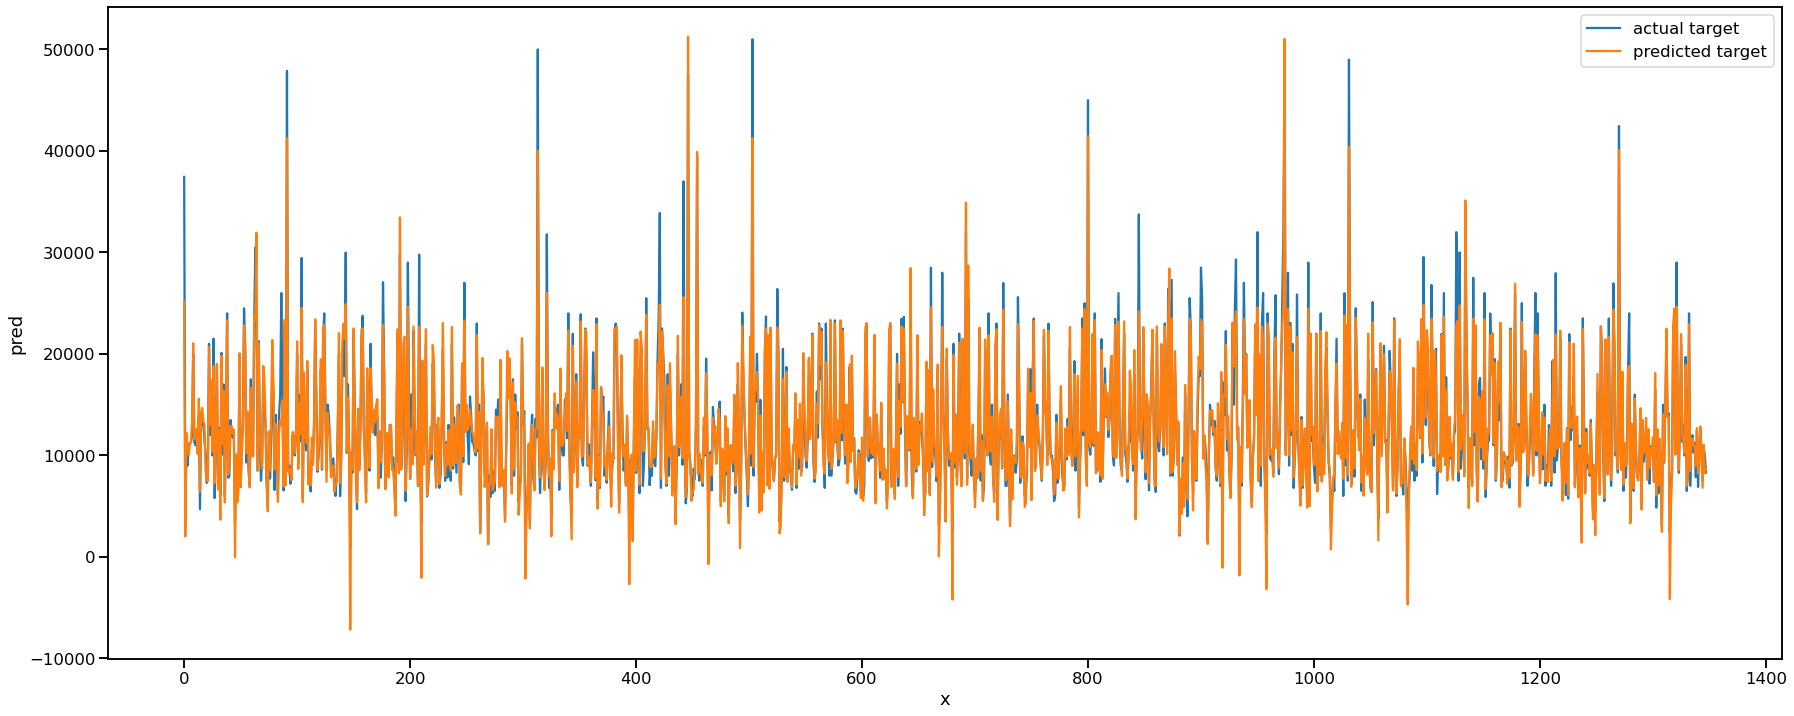

In [393]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

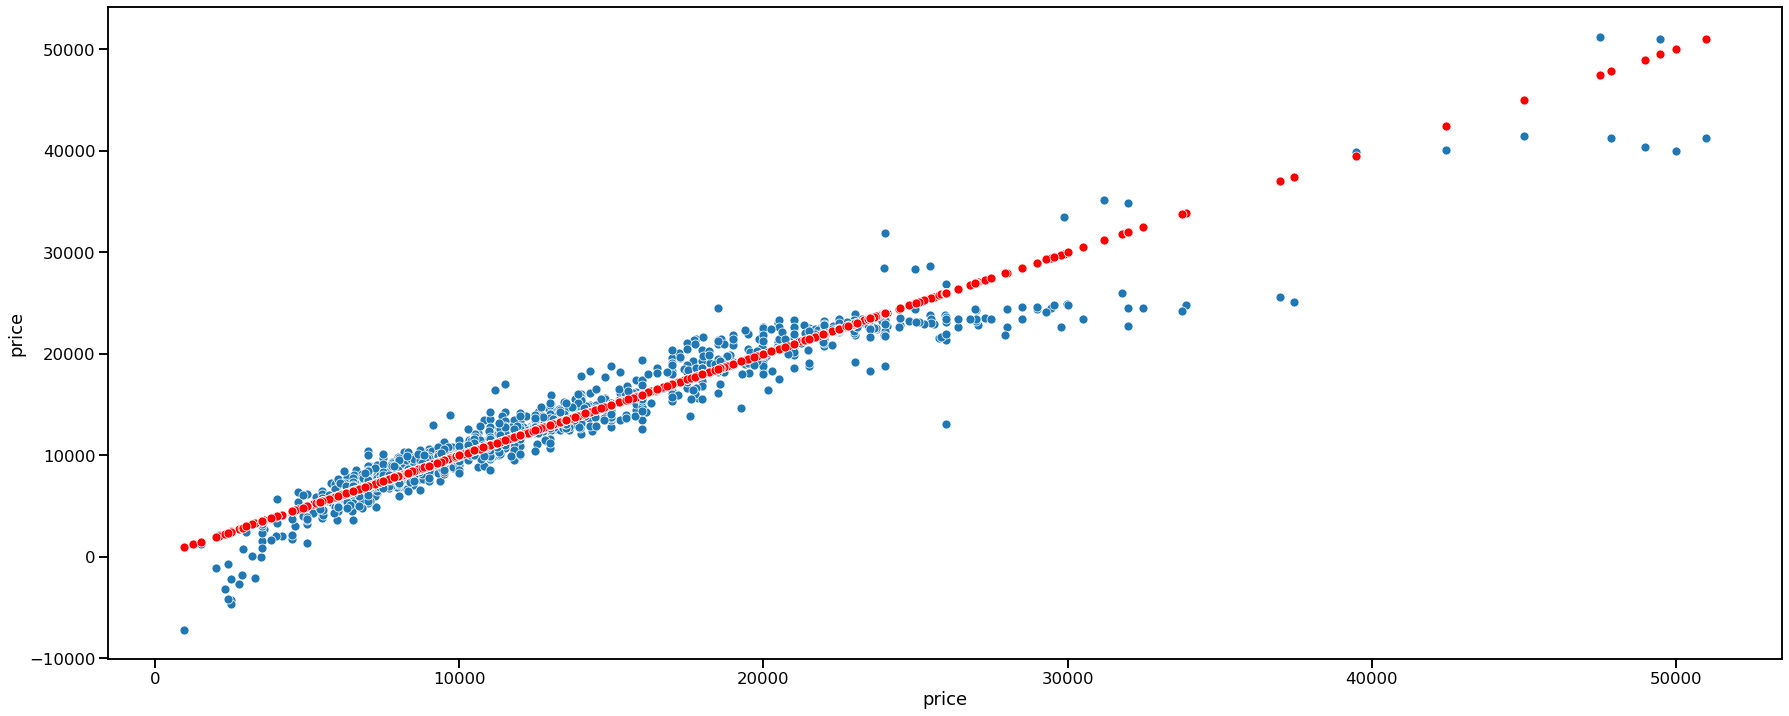

In [394]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')

plt.show()